
Model Accuracy: 100.00%

Decision Tree Rules:

|--- height_cm <= 160.00
|   |--- class: 0
|--- height_cm >  160.00
|   |--- class: 1



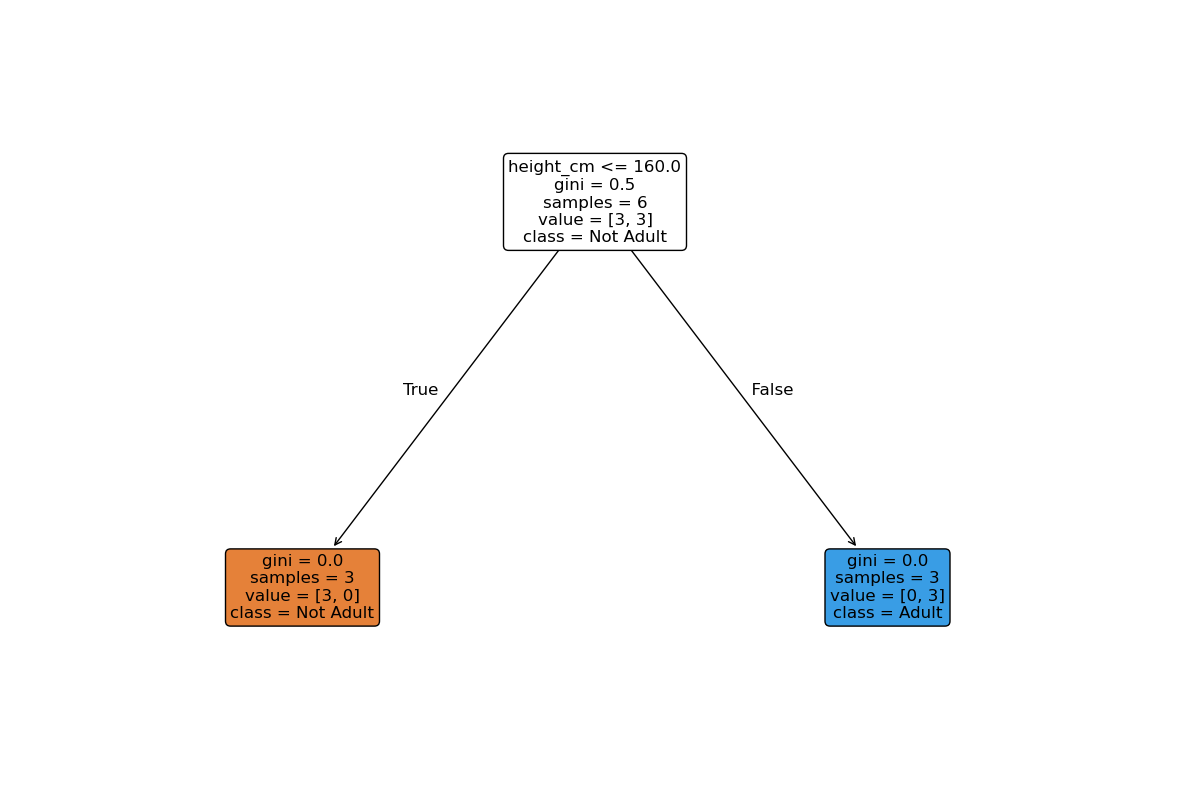


Prediction for sample [20, 168, 60]: Adult


In [1]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Features: [age, height_in_cm, weight_in_kg]
X_manual = [
    [12, 140, 35],   # Child
    [17, 160, 55],   # Teenager (not adult)
    [25, 170, 65],   # Adult
    [30, 180, 75],   # Adult
    [10, 130, 30],   # Child
    [40, 175, 70],   # Adult
    [15, 155, 50],   # Teenager (not adult)
    [22, 165, 60],   # Adult
]

# Labels: 0 = Not adult, 1 = Adult
y_manual = [0, 0, 1, 1, 0, 1, 0, 1]

# Convert to numpy arrays
X = np.array(X_manual)
y = np.array(y_manual)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train Decision Tree classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Show decision rules
feature_names = ['age', 'height_cm', 'weight_kg']
print("\nDecision Tree Rules:\n")
tree_rules = export_text(clf, feature_names=feature_names)
print(tree_rules)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=['Not Adult', 'Adult'],
    filled=True,
    rounded=True,
    precision=1,
    proportion=False,
    fontsize=12
)
plt.tight_layout()
plt.show()

# Predict new sample manually
sample = [20, 168, 60]  # Age 20, height 168 cm, weight 60 kg
prediction = clf.predict([sample])[0]
print(f"\nPrediction for sample {sample}: {'Adult' if prediction == 1 else 'Not Adult'}")
